<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b>
<br>У тебя ошибка в пути к файлу. Поправь, пожалуйста, чтобы я смог проверить твою работу. На всякий случай приложу корректный путь к файлу на платформе
    
    /datasets/real_estate_data.csv'
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнял проект локально, поэтому был такой путь. Сейчас исправил все.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если ты работаешь локально, то лучше указывать два пути к файлу через конструкцию try...except...
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Отобразил все колонки, вывел библиотеки в отдельную ячейку.
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

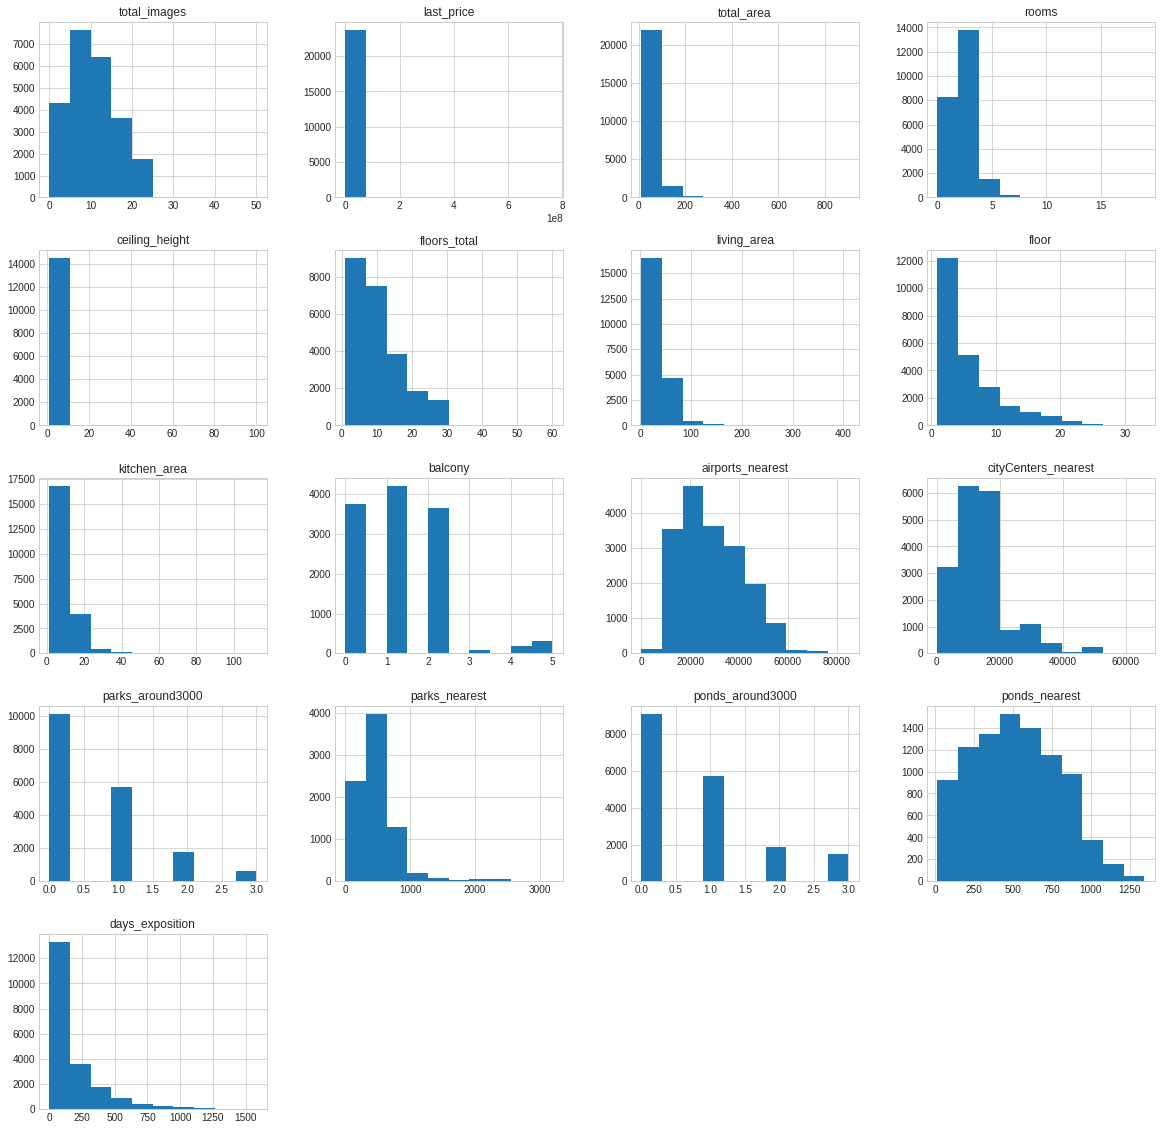

In [4]:
df.hist(figsize=(20, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
		
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Избавился от строки над графиком.
</div>

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод**
Исходные данные включают в себя информацию о `23699` квартирах выставленных на продажу. Проанализировав данные, можно определить, что в некоторых столбцах отсутствуют значения, присутствуют нулевые значения и определен некорректных тип данных. Более того, в данных так же присутствуют аномальные значения. Например, минимальная высота потолков `1` м, а максимальная `100` м, безусловно эти значения выбиваются из имеющихся данных.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

#### Определим наличие пропусков

In [6]:
nan_columns = df.isna().sum()
nan_columns = nan_columns[nan_columns != 0].index.tolist()
print(f'В следующих столбцах есть пропуски: {nan_columns}.')

В следующих столбцах есть пропуски: ['ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'].


#### Заполним пропуски

In [7]:
# Заполним пропуски в 'ceiling_height' медианным значением. 
# Среднее (2.77) и медианное (2.65) значение не сильно отличается в данном столбце.  
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

# Удалим строки с пропусками из 'floors_total' (пропущено всего 0.4 % от всех записей) и 'locality_name' (пропущено всего 0.2 % от всех записей).
# т.к. на расчет рыночной стоимости определенно влияет местоположение квартиры и этажность дома. 
df = df.dropna(subset = ['locality_name', 'floors_total' ])

# В столбце 'is_apartment' вероятнее всего отсутствующие значения говорят о том, что квартира не является аппартаментами.
df['is_apartment'] = df['is_apartment'].fillna(False)

# С толбцах 'living_area' и 'kitchen_area' пропуски составляют около 10% всех значений. Более того, данные значений 
# влияют на стоимость квартиры, поэтому будет целесообразно заполнить пропуски, а не удалять их. Чтобы заполнить пропуски,
# определим какую часть от всей площади квартиры в среднем составляет жилая площадь и кухня 
# (будем использовать медианное значение, т.к. данные разнородные) и заполним пропуски полученным  значением, умножив его на общую площадь квартиры.
df['living_area'] = df['living_area'].fillna(df['total_area'] * df['living_area'].mean() / df['total_area'].mean())
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * df['kitchen_area'].mean() / df['total_area'].mean())
                                       
# С толбцах 'parks_around3000' и 'ponds_around3000', можно предположить, что пропущенные значения свидетельствуют об отсутсвии данных
# объектов рядом с квартирой. В столбцах ['parks_nearest', 'ponds_nearest'] пропуски лишь у тех квартир, где поблизости нет парков или прудов. 
# Соответственно, заполнить пропуски каким-либо числовым значением будет некорректно.
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

# В столбце 'balcony', вероятно, пропуски свидетельствуют об отсутствии балкона.
df['balcony'] = df['balcony'].fillna(0)

# Пропуски в столбцах [ 'airports_nearest', 'cityCenters_nearest', 'days_exposition'] так же оставим незаполненными

nan_columns = df.isna().sum()
nan_columns = nan_columns[nan_columns != 0].index.tolist()
print(f'Пропуски остались лишь в столбцах: {nan_columns}.')

Пропуски остались лишь в столбцах: ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition'].


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены для столбцов living_area / kithen_area
</div>

#### Изменение типов данных

In [8]:
# Тип данных изменен в столбцах ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000'] на целочисленный,
# так как они могут принимать лишь такие значения.
cols_to_change = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
df[cols_to_change] = df[cols_to_change].astype(int)

# Тип данных изменен в столбцах ['first_day_exposition'] на datetime64, т.к. это дата публикации в iso формате.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

# Заменил тип данных с float64 на float32 
df[df.select_dtypes(include=['float64']).columns] = df[df.select_dtypes(include=['float64']).columns].astype('float32')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

#### Устранение неявных дубликатов в названиях населенных пунктов

In [9]:
df['locality_name'].nunique()

364

In [10]:
def duplicates(name):
    what_to_change = ['поселок','посёлок', 'при железнодорожной', 'станции', 'городского типа',
                      'городской','коттеджный','садовое товарищество','садоводческое некоммерческое товарищество',
                      'село', 'деревня']
    no_duplicates = []
    for k in what_to_change:
        if k in name:
            name = name.replace(k, '').strip()        
    return name

In [11]:
df['locality_name'] = df['locality_name'].apply(lambda x: duplicates(x))

In [12]:
df['locality_name'].nunique()

305

Были убраны приставки из названий населенных пунктов, тем самым удалось избавиться от `59` дубликатов в столбце 'locality_name'.

#### Устранение редких и выбивающихся значений

In [13]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,23565.0,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6540058.5,60.322826,2.070656,2.724530,10.675875,34.592278,5.878124,10.499897,0.593677,28797.082031,14192.656250,0.468831,490.580444,0.589900,518.289490,180.741394
std,5.681156,10910935.0,35.657059,1.078591,0.991026,6.594823,22.373678,4.871485,6.037750,0.960660,12632.500000,8613.348633,0.748403,341.572968,0.883966,278.009552,219.732788
min,0.000000,12190.0,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400000.0,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4646000.0,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6790000.0,69.699997,3.000000,2.700000,16.000000,42.099998,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,763000000.0,900.000000,19.000000,100.000000,60.000000,409.700012,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видно, что аномальные значения есть в столбцах : 'ceiling_height', 'living_area'. В столбце 'rooms' значение 0 может указывать, что квартира - студия. 

In [14]:
# Видно, что есть квартиры с высотой потолков меньше 2 м (3 квартиры) и больше 14 м. Вероятно, у квартир с высотой потолков 
# больше 10 м была ошибка при вводе данных ( можно предположить 24 м = 2.4 м). А квартиры с высотой потолков < 2 м удалим, их 
# всего 3, поэтому их отсутсвие большого влияния на данные не окажет.
df.loc[df['ceiling_height'] >= 14, 'ceiling_height'] = df.loc[df['ceiling_height'] >= 14, 'ceiling_height'] / 10
df = df.drop(df[df.ceiling_height < 2].index)

In [15]:
# Видно, что есть квартиры с очень маленькой жилой площадью. Заменим значения меньше 7, аналогичным образом, как в п. 2.2.
df['living_area'].value_counts().sort_index().head(20)
df.loc[df['living_area'] <7, 'living_area'] = df['total_area'] * df['living_area'].mean() / df['total_area'].mean()

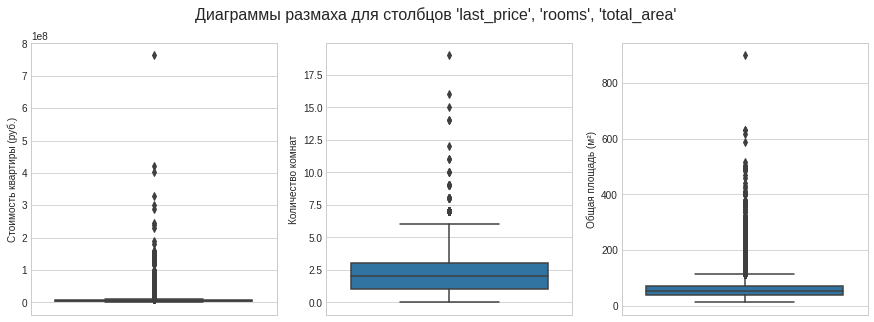

In [16]:
#Рассмотрим столбцы 'last_price', 'rooms', 'total_area'
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.boxplot(data=df, y='last_price', ax=axes[0])
plt.setp(axes[0], ylabel='Cтоимость квартиры (руб.)')

sns.boxplot(data=df, y='rooms', ax=axes[1])
plt.setp(axes[1], ylabel='Количество комнат')

sns.boxplot(data=df, y='total_area', ax=axes[2])
plt.setp(axes[2], ylabel='Общая площадь (м²)');

fig.suptitle("Диаграммы размаха для столбцов 'last_price', 'rooms', 'total_area'", fontsize=16);

In [17]:
#Видно, что в каждом из столбцов есть выбросы. Посчитаем количесвто данных, которые больше 1.5*Q3, 
#если их суммарное количество окажется меньше 10% от изначальной выборки, то отбросим эти записи.
diff = []
upper_limit = {}
for i in ['last_price', 'rooms', 'total_area']:
    q75, q25 = np.percentile(df[i], [75 ,25])
    iqr = q75 - q25
    q75_limit = q75 + 1.5*iqr
    upper_limit.update({i: q75_limit})
    new_df = df[df[i] <= q75_limit ]
    diff.append((1-new_df.shape[0] / df.shape[0]))

print(f'Выбросы во всех перечисленных столбцах составляют {sum(diff):.2%} от исходных данных')

Выбросы во всех перечисленных столбцах составляют 14.32% от исходных данных


In [18]:
#На предыдущем шаге в 14.32% могут входить так же дублирующиеся записи (т.е. по 2-ум или 3-м столбцам данные могут 
#быть выбросами). Профильтруем исходную таблицу и посмотрим, сколько данных осталось.
clear_df = df.query("last_price <=  @upper_limit['last_price'] & \
                     rooms <=  @upper_limit['rooms'] & \
                     total_area <=  @upper_limit['total_area']")

total_diff = 1-(clear_df.shape[0] / df.shape[0])
print(f'Таблица без аномальных значений в итоге на {total_diff:.2%} меньше исходной таблицы')

Таблица без аномальных значений в итоге на 9.45% меньше исходной таблицы


In [19]:
df = clear_df.copy()

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё изучим аномалии в других столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Построил диаграммы размаха для указанных вами столбцов, проверил какую часть составляют выбросы и удалил их и перезаписал исходный датафрейм.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [20]:
# Столбец - цена одного квадратного метра. Сократим до 0 знака после запятой, аналогично столбцу 'last_price'.
df['price_sqm'] = round(df['last_price'] / df['total_area'], 0)

# Столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

# Столбец - месяц публикации объявления;
df['exposition_month'] = df['first_day_exposition'].dt.month

# Столбец - год публикации объявления;
df['exposition_year'] = df['first_day_exposition'].dt.year

# Столбец - тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor_category(floor, floor_total):
    if floor == 1:
        return 'первый'
    elif floor == floor_total:
        return 'последний'
    else:
        return 'другой'
    
df['floor_type'] = df.apply(lambda x: floor_category(x['floor'], x['floors_total']), axis = 1)

# Столбец - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000, 0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Гистограммы

count    21334.000000
mean        52.595715
std         17.693272
min         12.000000
25%         39.000000
50%         49.000000
75%         63.000000
max        114.199997
Name: total_area, dtype: float64

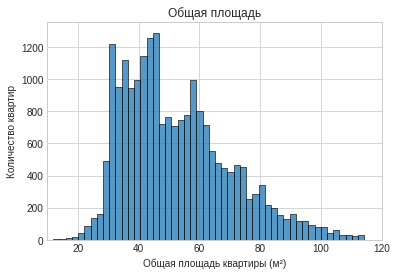

In [21]:
# Площадь: общая
sns.histplot(data=df, x='total_area', bins = 50,).set(title = 'Общая площадь', xlim = (10,120))
plt.xlabel('Общая площадь квартиры (м²)')
plt.ylabel('Количество квартир')
df['total_area'].describe()

**Вывод:** Распределение квартир по общей площади - нормальное, есть небольшое количество выбивающихся значений. Большинство встречающихся квартир - с площадью 40 - 50 м².

count    21334.000000
mean        30.140228
std         12.550074
min          7.425261
25%         18.299999
50%         29.000000
75%         38.900002
max         93.599998
Name: living_area, dtype: float64

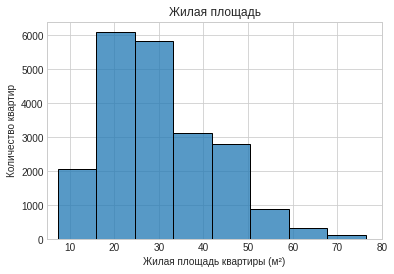

In [22]:
# Площадь: жилая
sns.histplot(data=df, x='living_area', bins = 10,).set(title = 'Жилая площадь', xlim = (5,80))
plt.xlabel('Жилая площадь квартиры (м²)')
plt.ylabel('Количество квартир')
df['living_area'].describe()

**Вывод:** Распределение квартир по жилой площади - близкое к нормальному, есть небольшое количество выбивающихся значений. Большинство встречающихся квартир - с жилой площадью 15 - 30 м².

count    21334.000000
mean         9.439760
std          3.724317
min          1.300000
25%          7.000000
50%          8.900000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

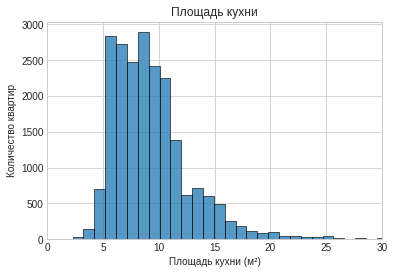

In [23]:
# Площадь: кухни
sns.histplot(data=df, x='kitchen_area', bins = 50,).set(title = 'Площадь кухни', xlim = (0,30))
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Количество квартир')
df['kitchen_area'].describe()

**Вывод:** Распределение квартир площади кухни - нормальное, есть небольшое количество выбивающихся значений. Большинство встречающихся квартир - с площадью кухни около 7 - 10 м².

count       21334.00
mean      4799872.00
std       2178501.75
min         12190.00
25%       3300000.00
50%       4400000.00
75%       5950000.00
max      11866860.00
Name: last_price, dtype: float64

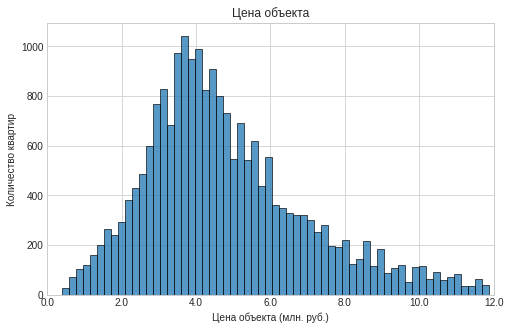

In [24]:
# Цена объекта
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x='last_price').set(title = 'Цена объекта', xlim = (0,12000000))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x/1000000)))

plt.xlabel('Цена объекта (млн. руб.)')
plt.ylabel('Количество квартир')
plt.show
df['last_price'].describe()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Изменил ось Х на миллионы.
</div>

**Вывод:** Распределение цены объекта - нормальное, есть небольшое количество высоких значений. Большинство встречающихся квартир - с ценой на момент снятия публикации около 4- 5 млн. руб.

count    21334.000000
mean         1.911784
std          0.888369
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

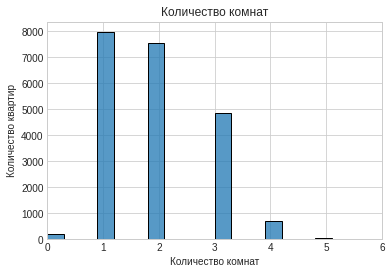

In [25]:
# Количество комнат
sns.histplot(data=df, x='rooms', bins = 20,).set(title = 'Количество комнат', xlim = (0,6))
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
df['rooms'].describe()

**Вывод:** Распределение квартир по количеству комнат - нормальное. Большинство встречающихся квартир - с количеством комнат 1 - 3. Есть квартиры с количеством комнат 0 можно предположить, что это студии.

count    21334.000000
mean         2.672171
std          0.201637
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

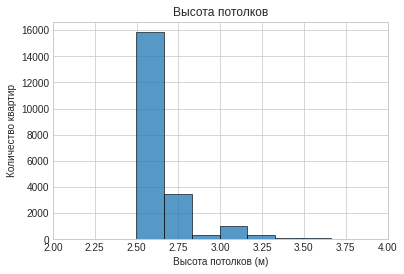

In [26]:
# Высота потолков
sns.histplot(data=df, x='ceiling_height', bins = 50).set(title = 'Высота потолков', xlim = (2,4))
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
df['ceiling_height'].describe()

**Вывод:** Распределение квартир по высоте потолков - нормальное. Большинство встречающихся квартир - с высотой потолка  2.5 - 2.6 м. Есть квартиры с высотой потолков 10 м, что вызывает подозрения в достоверности данных.

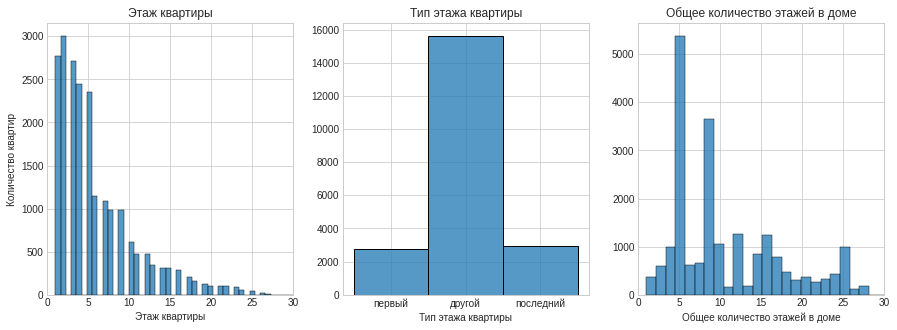

In [27]:
# Этаж, тип эатажа и общее количество этажей в доме
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(data=df, x='floor', bins = 50, ax = axes[0]).set(title = 'Этаж квартиры',xlim = (0,30))
plt.setp(axes[0], xlabel='Этаж квартиры')
plt.setp(axes[0], ylabel='Количество квартир')
#print(df['floor'].describe(), '\n')


sns.histplot(data=df, x='floor_type', bins = 50, ax = axes[1]).set(title = 'Тип этажа квартиры')
plt.setp(axes[1], xlabel='Тип этажа квартиры')
plt.setp(axes[1], ylabel=None)

sns.histplot(data=df, x='floors_total', bins = 50, ax = axes[2]).set(title = 'Общее количество этажей в доме', xlim = (0,30))
plt.setp(axes[2], xlabel='Общее количество этажей в доме')
plt.setp(axes[2], ylabel=None);
#print(df['floors_total'].describe())

**Вывод:** Распределение квартир по этажам - нормальное. Большинство квартир  расположены на этажах до 6 -го, причем около 80% квартир находятся на этажах между первым и последним. Касаемо общего количества этажей в дом, можно отметить, что большая часть это 5 или 9 - этажные дома, что вполне логично, т.к. высотные здания стали появляться в крупных городах и намного позже, а в маленьких населенных пунктах их количество совсем ничтожное.

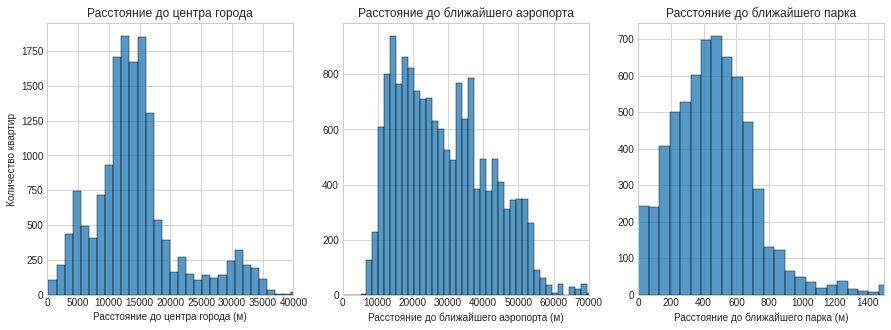

In [28]:
# Расстояние до: центра города, ближайшего аэропорта и ближайшего парка.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='cityCenters_nearest', bins = 50, ax = axes[0]).set(title = 'Расстояние до центра города',xlim =(0,40000))
plt.setp(axes[0], xlabel='Расстояние до центра города (м)')
plt.setp(axes[0], ylabel='Количество квартир')
#print(df['cityCenters_nearest'].describe())

sns.histplot(data=df, x='airports_nearest', bins = 50, ax = axes[1]).set(title = 'Расстояние до ближайшего аэропорта', xlim =(0,70000))
plt.setp(axes[1], xlabel='Расстояние до ближайшего аэропорта (м)')
plt.setp(axes[1], ylabel=None)
#print(df['airports_nearest'].describe())

sns.histplot(data=df, x='parks_nearest', bins = 50, ax = axes[2]).set(title = 'Расстояние до ближайшего парка', xlim = (0,1500))
plt.setp(axes[2], xlabel='Расстояние до ближайшего парка (м)')
plt.setp(axes[2], ylabel=None);
#print(df['parks_nearest'].describe())

**Вывод:** Видно, что из имеющихся данных, большая часть объектов расположена в 10 - 15 км от центра. Это характерно для населенных пунктов, расположенных в области. В среднем расстояние до ближайшего аэропорта составляет 15 - 40 км. Можно так же утверждать, что практически рядом со всеми объектами в шаговой доступности расположен парк (для записей, где расстояние до ближайшего парка известно).

count    21334.000000
mean         6.400534
std          3.492352
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64


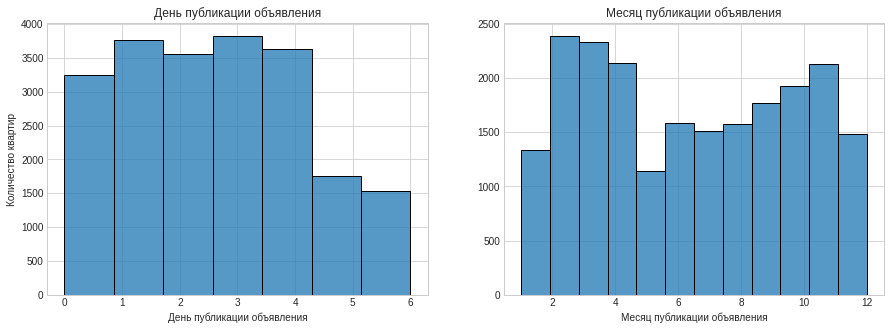

In [29]:
# День и месяц публикации объявления
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='exposition_weekday', bins = 7, ax = axes[0]).set(title = 'День публикации объявления')
plt.setp(axes[0], xlabel='День публикации объявления')
plt.setp(axes[0], ylabel='Количество квартир')
#print(df['exposition_weekday'].describe())

sns.histplot(data=df, x='exposition_month', bins = 12, ax = axes[1]).set(title = 'Месяц публикации объявления')
plt.setp(axes[1], xlabel='Месяц публикации объявления')
plt.setp(axes[1], ylabel=None)
print(df['exposition_month'].describe())

**Вывод:** Видно, что наиболее часто объявления публикуют в будние дни, а в выходные публиковалось лишь 15% всех объявлений. Так же можно отметить, что больше всего публиковалось объявлений весной и осенью.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Отдельный плюс за то, что ты подписываешь графики и их оси
</div>

#### Анализ времени продажи квартиры

Длительность объявления (среднее): 172
Длительность объявления (медиана): 91
Быстрая продажа: 43
Долгая продажа: 217


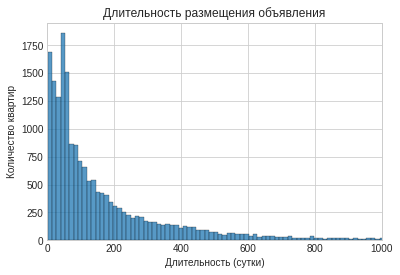

In [30]:
sns.histplot(data=df, x='days_exposition').set(title = 'Длительность размещения объявления', xlim = (0, 1000))
plt.xlabel('Длительность (сутки)')
plt.ylabel('Количество квартир')

print(f'Длительность объявления (среднее): {df["days_exposition"].describe()["mean"] :.0f}')
print(f'Длительность объявления (медиана): {df["days_exposition"].describe()["50%"] :.0f}')
print(f'Быстрая продажа: {df["days_exposition"].describe()["25%"] :.0f}')
print(f'Долгая продажа: {df["days_exposition"].describe()["75%"] :.0f}')

**Вывод:** Проанализировав, видно, что обычно на продажу квартиры уходит 100 дней (среднее - 172 день,  медиана - 91 день). В данном случае мы берем медианное значение, так как есть квартиры которые продавались за несколько суток, а так же небольшое количество квартир, которые больше 3 - х лет находились в публикации. Быстрыми и необычно долгими можно считать продажи в 43 и 217 дней соответственно.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Факторы, влияющие на полную стоимость

In [31]:
df['last_price'].describe()

count       21334.00
mean      4799872.00
std       2178501.75
min         12190.00
25%       3300000.00
50%       4400000.00
75%       5950000.00
max      11866860.00
Name: last_price, dtype: float64

Коэффициент корреляции Пирсона:
 общая площадь - полная цена: 0.69                                             
 жилая площадь - полная цена: 0.57                                             
 площадь кухни - полная цена: 0.50


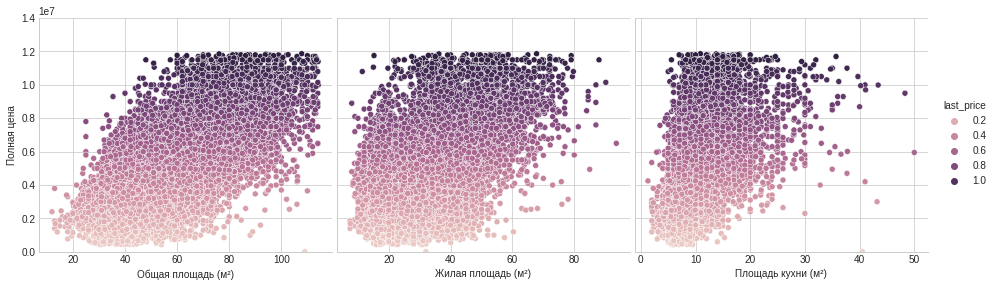

In [32]:
#Площадь: общая, жилая и кухни
pairplot = sns.pairplot(data=df,
                  y_vars=['last_price'],
                  x_vars=['total_area', 'living_area', 'kitchen_area'], height=4, aspect=1.1, hue = 'last_price') \
                  .set(ylim = (0,14000000))

labels=["Общая площадь (м²)","Жилая площадь (м²)", "Площадь кухни (м²)" ]
for ax, lbl in zip(pairplot.axes.flatten(), labels):
    ax.set_xlabel(f'{lbl}')
    ax.set_ylabel(f'Полная цена')

print(f"Коэффициент корреляции Пирсона:\n общая площадь - полная цена: {df['last_price'].corr(df['total_area']):.2f} \
                                            \n жилая площадь - полная цена: {df['last_price'].corr(df['living_area']):.2f} \
                                            \n площадь кухни - полная цена: {df['last_price'].corr(df['kitchen_area']):.2f}")


**Вывод:** Зависимость между полной ценой и общей площадью более ярко выражена - согласно корреляции Пирсона - 0.69. То есть, чем больше общая площадь тем дороже квартира. Аналогично и для жилой площади и площади кухни, но там закономерность выражена чуть слабее, но тренд сохраняется.

Коэффициент корреляции Пирсона:
 количество комнат - полная цена: 0.43


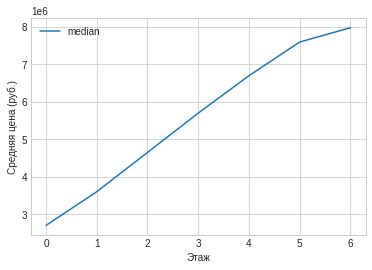

In [33]:
#Количество комнат
pivot_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'], dropna=True)
sns.lineplot(data=pivot_rooms)
plt.xlabel('Этаж')
plt.ylabel('Средняя цена (руб.)')

print(f"Коэффициент корреляции Пирсона:\n количество комнат - полная цена: {df['last_price'].corr(df['rooms']):.2f}")

**Вывод:** Видно, что с ростом количества комнат растет и цена. Самыми дорогими являются 6-комнатные объекты, самыми дешевыми - студии.

,mean_last_price
floor_type,
другой,4550000.0
первый,3800000.0
последний,4000000.0


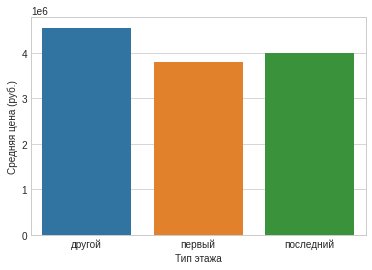

In [34]:
#Тип этажа
pivot_floor_type = df.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['median'], dropna=True)
pivot_floor_type.columns = ['mean_last_price']
sns.barplot(data=pivot_floor_type, x=pivot_floor_type.index, y='mean_last_price' )
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена (руб.)')

pivot_floor_type

**Вывод:** Видно, что квартиры на промежуточных этажах дороже всего. На первом этаже квартиры жешевле на 16.5% по сравнению с квартирами на промежуточных этажах и на 5% по сравнению с квартирами на последних этажах.

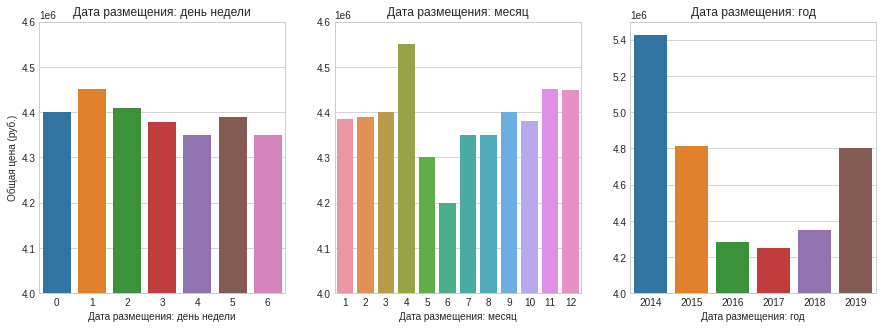

In [35]:
#Дата размещения: день недели
pivot_weekday = df.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = ['median'], dropna=True)
pivot_weekday.columns = ['last_price']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=pivot_weekday, x=pivot_weekday.index, y='last_price', ax = axes[0]).set(title = 'Дата размещения: день недели', ylim=(4000000,4600000))
plt.setp(axes[0], xlabel='Дата размещения: день недели')
plt.setp(axes[0], ylabel='Общая цена (руб.)')

#Дата размещения: месяц
pivot_month = df.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = ['median'], dropna=True)
pivot_month.columns = ['last_price'] 

sns.barplot(data=pivot_month, x=pivot_month.index, y='last_price', ax = axes[1]).set(title = 'Дата размещения: месяц', ylim=(4000000,4600000))
plt.setp(axes[1], xlabel='Дата размещения: месяц')
plt.setp(axes[1], ylabel=None)

#Дата размещения: год
pivot_year = df.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = ['median'], dropna=True)
pivot_year.columns = ['last_price'] 

sns.barplot(data=pivot_year, x=pivot_year.index, y='last_price', ax = axes[2]).set(title = 'Дата размещения: год', ylim=(4000000,5500000))
plt.setp(axes[2], xlabel='Дата размещения: год')
plt.setp(axes[2], ylabel=None);

**Вывод:** 
* Дата размещения: день недели: 
<br />дороже всего квартиры, опубликованные во вторник, далее цена незначиельно падает достигая минимума в воскресенье.
* Дата размещения: месяц:
<br />квартиры, выставленные на продажу в апреле самые дорогие, а в июне - самые дешевые.
* Дата размещения: год:
<br />видна тенденция на снижение стоимости квартир, начиная с 2014 года, что можно объяснить Валютныйм кризисом в России (2014— 2015), который привел к снижению спроса и соответственно снижению цены. Далее, вероятно, экономика стабилизировалась, и цены на квартиры стали расти.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Здорово, что ты используешь разные типы графиков
</div>

#### Средняя цена 1 м² в 10 населённых пунктах с наибольшим числом объявлений

Населенный пункты с самой высокой стоимостью квадратного метра: Санкт-Петербург
Населенный пункты с самой низкой  стоимостью квадратного метра: Выборг


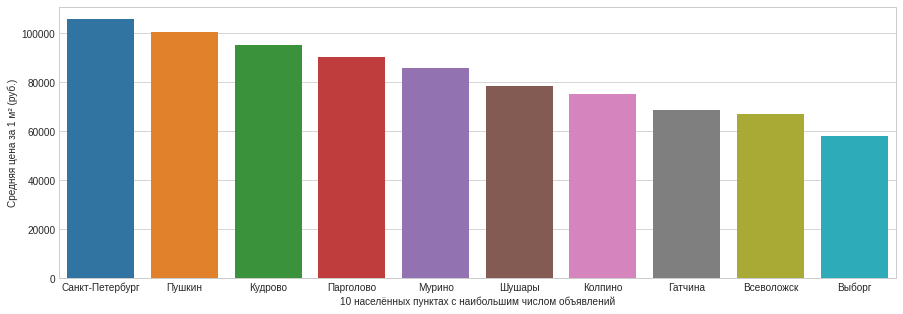

In [36]:
top_10 = df.pivot_table(index = 'locality_name', values = 'price_sqm', aggfunc=['count', 'mean']).sort_values(
        ('count', 'price_sqm'),ascending=False).head(10)
top_10 = top_10[('mean', 'price_sqm')].to_frame()
top_10.columns = ['mean_price_sqm']
top_10 = top_10.sort_values(by='mean_price_sqm', ascending=False)

fig, axes = plt.subplots(figsize=(15, 5))
sns.barplot(data=top_10, x=top_10.index, y='mean_price_sqm')
plt.setp(axes, xlabel='10 населённых пунктах с наибольшим числом объявлений')
plt.setp(axes, ylabel='Средняя цена за 1 м² (руб.)')

print(f'Населенный пункты с самой высокой стоимостью квадратного метра: {top_10[["mean_price_sqm"]].idxmax()[0]}')
print(f'Населенный пункты с самой низкой  стоимостью квадратного метра: {top_10[["mean_price_sqm"]].idxmin()[0]}')


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Построил барплот.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Красота!
</div>

#### Средняя цена каждого километра

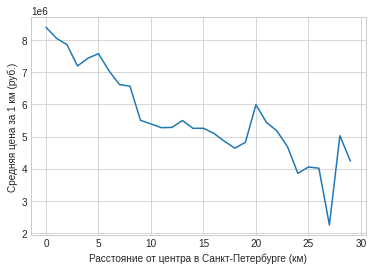

In [37]:
mean_price_per_km = df.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_nearest_km')['last_price'].mean().to_frame()
sns.lineplot(data=mean_price_per_km, legend=None)
plt.xlabel('Расстояние от центра в Санкт-Петербурге (км)')
plt.ylabel('Средняя цена за 1 км (руб.)');

**Вывод:** Видно, что c удалением от центра квартиры дешевеют. На графике видны скачки в стоимости, можно предположить, что на данном расстоянии находится какой-либо исторический объект, либо объект инфраструктуры (например метро), влияющий на цену.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

1. В результате проделанной работы мною была произведена предобработка входных данных: определил и заполнил пропущенные значения там, где это возможно; изменил типы данных на более подходящие с точки зрения анализа и вычислительной эффективности. Проанализировал аномальные значения в различных столбцах (общая стоимость, количество комнат, общая площадь, жилая площадь, высота потолков). Удалил записи, содержащие выбросы в указанных выше столбцах, учитывая, что количество выбросов должно быть меньше 10% от исходной выборки, в противном случае анализ данных может быть некорректен. Посчитал и добавил в таблицу данные о цене квадратного метра жилья, вывели день недели, месяц и год публикации объявлений, разделил объявления на категории по этажам квартир и добавил столбец, показывающий расстояние до центра города в км.  <br /> 
2. Проанализровал параметры, влияющие на рыночную стоимость объектов недвижимости, и вывел следующие зависимости:
    - Площадь квартиры: чем больше общая площадь, тем дороже квартира.  <br /> 
    - Количество комнат не сильно влияет на стоимость.  <br /> 
    - Этаж: наиболее дешевыми являются квартиры, расположенные на первых этажах.  <br /> 
    - Расположение квартиры так же влияет на ее стоимость: в Санкт-Петербурге 1  м² стоит дороже всего (более 100 тыс. руб.), а в Выборге меньше всего ( 59 тыс. руб.). Причем в СПб удаленность от центра так же влияет на цену недвижимости, с удалением от центра цена снижается, но зависимость не линейная, т.к. на цену так же влияют и другие факторы. <br /> 
    - На стоимость влияет экономическая ситуация в стране: если в стране кризис, то цена падает.
3. Более того, была проанализирована быстрота продажи квартир, и определно, что обычно на продажу квартиры уходит 100 дней.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай увеличим объем вывода, чтобы он получится более подробным. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. Твой вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 
</div>


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- дописать общий вывод
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Промежуточные выводы изменил после удаления аномальных значений и дополнил общий вывод.
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод